## K Means Clustering Alogorithm Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
%matplotlib inline

In [31]:
x, y = make_blobs(n_samples=1000, centers=3, n_features=2)  ## center means, we take only 3 group

In [32]:
x

array([[ 5.9247878 , -6.57911698],
       [-7.86420409, -7.39188508],
       [ 7.18618281, -8.88097734],
       ...,
       [ 0.78808505,  7.1731932 ],
       [-2.72153107, -8.85363604],
       [ 1.27777766,  6.29969863]], shape=(1000, 2))

In [33]:
y

array([2, 0, 2, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 0, 1, 1,
       1, 2, 1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 2, 1, 1, 2, 2, 0, 0, 2, 1,
       1, 1, 0, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 2, 0,
       1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 2, 1, 1, 1, 2, 0, 0, 1, 2, 2, 1,
       2, 2, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 2, 0,
       2, 1, 0, 2, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 2, 1, 2, 2,
       1, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2, 0, 2, 2, 0,
       2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2,
       2, 2, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 1,
       1, 0, 0, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 0, 2, 1, 2, 2, 0, 1, 2, 1,
       2, 1, 2, 0, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 2, 0, 2, 2, 2, 2, 0, 0,
       1, 2, 2, 1, 1, 2, 0, 2, 1, 0, 0, 1, 1, 2, 2,

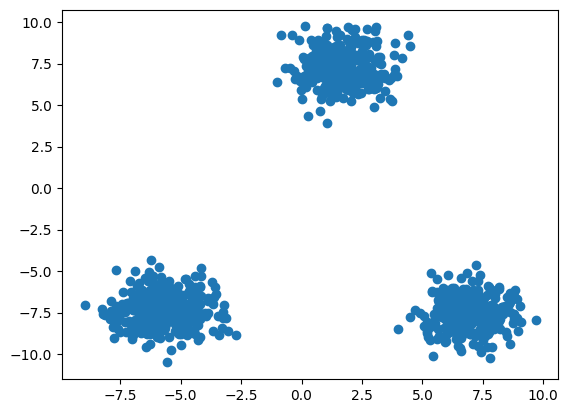

In [34]:
plt.scatter(x[:,0], x[:,1])

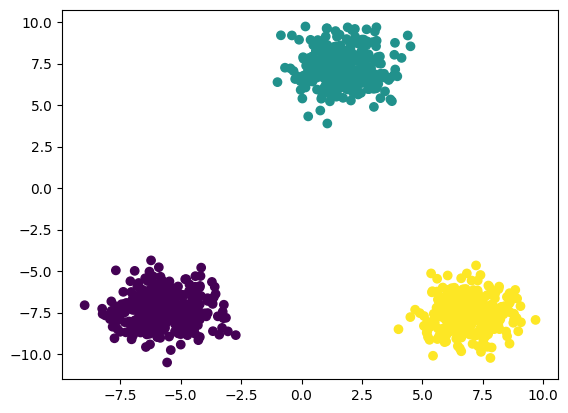

In [35]:
plt.scatter(x[:, 0], x[:, 1], c=y)

In [36]:
## Standardzation --> feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
## train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [38]:
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [39]:
## now import kmeans
from sklearn.cluster import KMeans

In [40]:
## Elbow method to select k value
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(x_train_scaler)
    wcss.append(kmeans.inertia_)

In [41]:
wcss

[1339.999999999999,
 676.4108293877398,
 37.214000166408404,
 32.75305197863215,
 27.553737828342378,
 21.921233734132556,
 19.702058738284162,
 17.845653224287293,
 15.681068913154515,
 14.795555516547076]

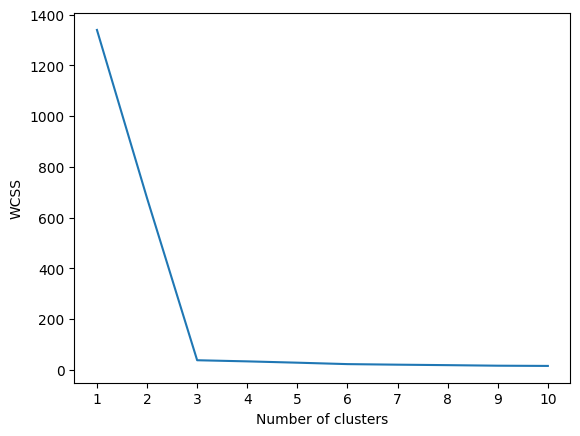

In [42]:
## plot elbow method
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [43]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit_predict(x_train_scaler)

array([0, 0, 2, 2, 2, 2, 1, 0, 1, 0, 2, 0, 2, 0, 0, 2, 1, 2, 1, 1, 1, 0,
       2, 1, 2, 1, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1, 0, 2, 2, 2, 0, 2, 1, 0,
       2, 1, 0, 2, 1, 1, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 0, 1, 1, 2, 0, 2,
       2, 0, 1, 0, 0, 1, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 2, 1, 2,
       0, 1, 0, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 2,
       1, 0, 1, 0, 0, 2, 0, 2, 2, 0, 0, 0, 1, 0, 2, 1, 1, 0, 0, 0, 2, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1, 1,
       1, 0, 2, 1, 1, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 2, 1, 2, 1,
       1, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 0, 0,
       0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 1, 1, 2, 1, 1, 2, 2, 0, 2, 0, 0, 2, 2, 1, 0, 1, 1,
       2, 1, 2, 0, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0,

In [44]:
y_pred = kmeans.predict(x_test_scaler)

In [45]:
y_pred

array([0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 2, 0, 1, 0,
       1, 2, 1, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 2, 1, 2, 1,
       2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 2, 2, 1, 0, 1, 0, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 2, 1, 0, 2, 2, 1, 2, 1, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 2, 0, 1, 0, 1, 2, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 2, 0, 2, 2,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2,
       0, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0,
       2, 0, 0, 2, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 1, 2,
       1, 0, 2, 2, 1, 2, 0, 0, 2, 0, 2, 0, 1, 1, 1, 0, 0, 0, 2, 2, 2, 1,
       1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 0, 2,
       2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 1, 2, 0, 2, 0, 2, 2, 2, 0, 0, 1,
       0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 1, 1, 0, 0, 0,

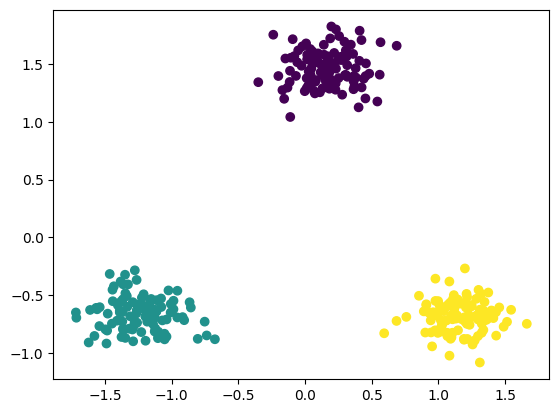

In [46]:
plt.scatter(x_test_scaler[:, 0], x_test_scaler[:, 1], c=y_pred)

## validating the k value
    kneelocator
    Silhoutee scoring

In [19]:
## kneelocator
!pip install kneed

In [47]:
from kneed import KneeLocator

In [48]:
kl = KneeLocator(range(1,11), wcss, curve='convex', direction='increasing')

In [49]:
kl.elbow

np.int64(10)

### Silhouette Score
The silhouette score is a metric used to evaluate the quality of clustering. It measures how similar an

In [50]:
from sklearn.metrics import silhouette_score

In [51]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train_scaler)
    score=silhouette_score(x_train_scaler,kmeans.labels_)
    silhouette_coefficients.append(score)

In [52]:
silhouette_coefficients

[np.float64(0.6019393878224801),
 np.float64(0.8730364002347084),
 np.float64(0.7010951070776364),
 np.float64(0.5337865611241003),
 np.float64(0.5368754396675842),
 np.float64(0.33852742566356164),
 np.float64(0.34023772468637387),
 np.float64(0.33318224270994196),
 np.float64(0.3569526150961133)]

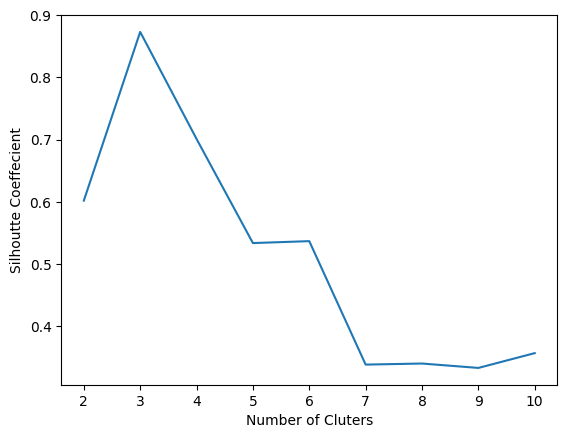

In [53]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()